<a href="https://colab.research.google.com/github/casjunior93/DIO--Aplicando-conhecimento-obtido-do-bootcamp-ciencia-de-dados-unimed/blob/master/Probabilidade_de_casos_mais_graves_de_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 
import missingno as msno

#Não exibir avisos de atenção
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.5f}'.format

#Versão mais nova do matplotlib
!pip install -U matplotlib --prefer-binary
import matplotlib
matplotlib.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.5.3'

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.


# 1 Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes e dados sobre a saúde dela. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# 2 Obter os dados

Os dados foram obtidos através de um dataset disponibilizado na plataforma Kaggle e pode ser acessado por este [link](https://www.kaggle.com/datasets/harshwalia/mortality-risk-clinincal-data-of-covid19-patients). Contém dados anônimos de 4.711 pacientes com infecção confirmada por SARS-CoV-2 e internados em um único sistema de saúde.

O arquivo de dados contém informações sobre dados demográficos, comorbidades, valores laboratoriais de admissão, medicamentos de admissão, pedidos de oxigênio suplementar de admissão, alta e mortalidade. Os dados foram derivados de um pacote de software de vigilância em saúde (Clinical Looking Glass [CLG]; Streamline Health, Atlanta, Geórgia) e revisão dos registros médicos primários.

Algumas das variáveis ​​incluídas no conjunto de dados são: tempo de internação hospitalar (LOS), infarto do miocárdio (IM), doença vascular periférica (PVD), insuficiência cardíaca congestiva (ICC), doença cardiovascular (DCV), demência (Dement), doença pulmonar obstrutiva (DPOC), diabetes mellitus simples (DM simples), diabetes mellitus complicado (DM complicado), saturação de oxigênio (OsSats), pressão arterial média, em mmHg (PAM), D-dímero, em mg/ml (Ddimer) , plaquetas, em k por mm3 (Plts), razão normalizada internacional (INR), nitrogênio ureico no sangue, em mg/dL (BUN), alanina aminotransferase, em U/litro (AST), enquanto células sanguíneas, em por mm3 (WBC ) e interleucina-6, em pg/ml (IL-6).

## 2.1 Importação dos dados

In [3]:
%%time
fonte = '/content/drive/MyDrive/ANÁLISES DE DADOS/Internações Covid/Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx'
df = pd.read_excel(fonte)

CPU times: user 5.47 s, sys: 70 ms, total: 5.54 s
Wall time: 5.72 s


In [4]:
df.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'Crc

In [5]:
df.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.49990,0,0,0.00000,0,1,0.01000,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.90000,1,1,0.60000,1,1,1.20000,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.90000,1,1,1.20000,1,0,0.00000,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.40000,1,1,7.30000,1,1,0.05000,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.60000,1,0,0.00000,0,1,0.01000,0


In [6]:
df.shape

(4711, 85)

# 3 Explorar os dados para obter informações úteis

## 3.1 Análise descritiva

Relatório dos dados com a biblioteca Sweetviz. Como são muitas colunas, um relatório gerado em HTML pode ajudar na visualização dos dados em geral.

In [7]:
%%time
#!pip install sweetviz

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [8]:
%%time
import sweetviz

CPU times: user 26.7 ms, sys: 3.98 ms, total: 30.7 ms
Wall time: 31 ms


In [9]:
%%time
analise=sweetviz.analyze(df)
analise.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
CPU times: user 47.2 s, sys: 16.4 s, total: 1min 3s
Wall time: 52.4 s


In [16]:
df.describe(include='all').iloc[:, :20]

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,MI,PVD,CHF,CVD,DEMENT,COPD,DM Complicated,DM Simple,Renal Disease,All CNS
count,4711.00000,4711.00000,4711.00000,4711.00000,4711,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,0-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.49968,0.92762,7.16026,0.24368,NaN,3.58629,0.36999,0.09892,0.02568,0.37211,0.04267,0.18743,0.11484,0.10741,0.07896,0.05625,0.10507,0.14562,0.17682,0.12885
std,0.50005,0.25915,7.02978,0.42935,NaN,2.28930,0.48285,0.29858,0.15821,0.48342,0.20212,0.40890,0.31886,0.30966,0.26971,0.23043,0.30668,0.35276,0.38156,0.33507
min,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,1.00000,3.00000,0.00000,NaN,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,1.00000,5.00000,0.00000,NaN,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,1.00000,1.00000,9.00000,0.00000,NaN,5.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [14]:
df.describe(include='all').iloc[:, 20:40]

,Pure CNS,Stroke,Seizure,OldSyncope,OldOtherNeuro,OtherBrnLsn,Age.1,AgeScore,O2SatsYes,OsSats,O2 Sat < 94,TempYes,Temp,Temp > 38,MapYes,MAP,MAP < 70,DDimerYes,Ddimer,D-Dimer > 3
count,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.10359,0.01231,0.00807,0.01868,0.03078,0.00573,63.36956,1.12630,0.96264,89.59372,0.39525,0.96540,35.81200,0.18128,0.95266,81.74740,0.07196,0.79070,3.22245,0.24432
std,0.30476,0.11028,0.08946,0.13541,0.17274,0.07550,16.70179,1.09601,0.18966,18.96741,0.48896,0.18278,7.73937,0.38529,0.21238,24.49042,0.25845,0.40685,5.26907,0.42973
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-17.77778,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,54.00000,0.00000,1.00000,90.00000,0.00000,1.00000,36.72222,0.00000,1.00000,75.83333,0.00000,1.00000,0.28000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,65.00000,1.00000,1.00000,95.00000,0.00000,1.00000,37.11111,0.00000,1.00000,86.66667,0.00000,1.00000,1.18000,0.00000
75%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,76.00000,2.00000,1.00000,98.00000,1.00000,1.00000,37.72222,0.00000,1.00000,96.00000,0.00000,1.00000,3.06000,0.00000


In [17]:
df.describe(include='all').iloc[:, 40:60]

,PltsYes,Plts,PltsScore,INRYes,INR,INR > 1.2,BUNYes,BUN,BUN > 30,CrtnYes,Creatinine,CrtnScore,SodimuYes,Sodium,Sodium < 139 or > 154,GlucoseYese,Glucose,Glucose <60 or > 500,ASTYes,AST
count,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.97368,226.39397,0.25048,0.90915,1.10499,0.24432,0.88177,27.19655,0.27277,0.97156,1.94745,0.48100,0.96222,131.21058,0.12566,0.70855,127.80981,0.02420,0.94927,63.20793
std,0.16011,115.13476,0.55722,0.28743,0.99757,0.42973,0.32292,31.21578,0.44543,0.16626,2.63781,0.77241,0.19069,31.01642,0.33150,0.45448,131.01186,0.15368,0.21947,204.49544
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,158.00000,0.00000,1.00000,1.00000,0.00000,1.00000,10.00000,0.00000,1.00000,0.80000,0.00000,1.00000,134.00000,0.00000,0.00000,0.00000,0.00000,1.00000,24.00000
50%,1.00000,212.00000,0.00000,1.00000,1.10000,0.00000,1.00000,17.00000,0.00000,1.00000,1.10000,0.00000,1.00000,137.00000,0.00000,1.00000,117.00000,0.00000,1.00000,38.00000
75%,1.00000,279.00000,0.00000,1.00000,1.20000,0.00000,1.00000,33.00000,1.00000,1.00000,1.80000,1.00000,1.00000,140.00000,0.00000,1.00000,164.00000,0.00000,1.00000,63.00000


In [18]:
df.describe(include='all').iloc[:, 60:80]

,AST > 40,ALTYes,ALT,ALT > 40,WBCYes,WBC,WBC <1.8 or > 4.8,LymphoYes,Lympho,Lymphocytes < 1,IL6Yes,IL6,IL6 > 150,FerritinYes,Ferritin,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes
count,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.45022,0.95818,42.84690,0.27425,0.97389,8.47160,0.82594,0.97389,1.30868,0.45086,0.44046,125.03501,0.06177,0.72044,1056.68945,0.54362,0.83613,10.31492,0.39333,0.65549
std,0.49757,0.20019,108.98941,0.44618,0.15948,7.35633,0.37920,0.15948,4.86303,0.49763,0.49649,2238.54611,0.24076,0.44883,3096.44975,0.49815,0.37020,11.22336,0.48854,0.47526
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,1.00000,16.00000,0.00000,1.00000,5.40000,1.00000,1.00000,0.70000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.90000,0.00000,0.00000
50%,0.00000,1.00000,26.00000,0.00000,1.00000,7.30000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,445.00000,1.00000,1.00000,6.50000,0.00000,1.00000
75%,1.00000,1.00000,43.00000,1.00000,1.00000,10.20000,1.00000,1.00000,1.40000,1.00000,1.00000,30.00000,0.00000,1.00000,1180.50000,1.00000,1.00000,16.00000,1.00000,1.00000


In [19]:
df.describe(include='all').iloc[:, 80:]

,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.00000,4711.00000,4711.00000,4711.00000,4711.00000
unique,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN
mean,1.58560,0.36595,0.86394,0.05156,0.09552
std,6.26262,0.48175,0.34289,0.26816,0.29396
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,1.00000,0.01000,0.00000
50%,0.10000,0.00000,1.00000,0.01000,0.00000
75%,0.40000,1.00000,1.00000,0.02000,0.00000


## 3.2 Verificando dados faltantes

In [20]:
%%time
import missingno as msno

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


CPU times: user 123 ms, sys: 64.4 ms, total: 187 ms
Wall time: 117 ms


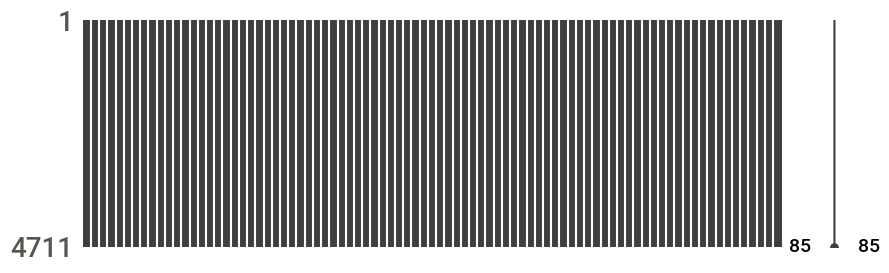

In [26]:
%%time
ax = msno.matrix(df, figsize=(10, 3))

A análise visual nos mostra que não há dados faltantes nesse dataset.

In [25]:
%%time
df.isnull().mean() * 100

CPU times: user 3.99 ms, sys: 2.18 ms, total: 6.17 ms
Wall time: 7.34 ms


Derivation cohort   0.00000
LOS_Y               0.00000
LOS                 0.00000
Death               0.00000
Age                 0.00000
                      ...  
Procalcitonin       0.00000
Procalciton > 0.1   0.00000
TropYes             0.00000
Troponin            0.00000
Troponin > 0.1      0.00000
Length: 85, dtype: float64